In this notebook will be developed a `process_row` function that will be used in the Processor component to process rows from the apartment dataset in Poland. The function will transform each record by applying various cleaning, normalization, and transformation operations.

## Processing Goals:

1. Converting categorical features to numerical
2. Normalizing numerical features to the range [0, 1]
3. Filling missing values
4. Creating new informative features
5. Removing unnecessary features

## Function Requirements:
- Accepts a single data row (`pandas.Series`)
- Returns a processed data row (`pandas.Series`)
- Does not modify the original dataset
- Converts string binary features ('yes'/'no') to boolean (True/False)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Chart display settings
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Display all DataFrame columns
pd.set_option('display.max_columns', None)

Let's load the cleaned dataset from the `cleaned_apartments.csv` file and examine its structure.

In [2]:
df = pd.read_csv('../datasets/cleaned_apartments.csv')
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,0.79,67.0,0.288,0.285,0.268,0.245,0.068,0.593,0.085,condominium,no,yes,yes,no,yes,449000
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,4.09,0.0,0.509,1.039,0.998,0.676,0.661,1.192,0.668,condominium,yes,yes,no,no,no,950000
2,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,1.93,39.0,0.073,0.326,0.284,0.089,0.180,0.041,0.388,cooperative,yes,no,no,yes,yes,380000
3,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,2.68,10.0,0.268,0.771,0.676,0.260,0.322,1.643,0.178,condominium,yes,yes,yes,yes,yes,799000
4,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,7.0,0.139,1.336,0.926,0.930,0.071,0.786,0.304,condominium,no,yes,no,no,yes,599000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11986 non-null  object 
 1   city                  11986 non-null  object 
 2   type                  11986 non-null  object 
 3   squareMeters          11986 non-null  float64
 4   rooms                 11986 non-null  float64
 5   floor                 11986 non-null  float64
 6   floorCount            11986 non-null  float64
 7   buildYear             11986 non-null  float64
 8   latitude              11986 non-null  float64
 9   longitude             11986 non-null  float64
 10  centreDistance        11986 non-null  float64
 11  poiCount              11986 non-null  float64
 12  schoolDistance        11986 non-null  float64
 13  clinicDistance        11986 non-null  float64
 14  postOfficeDistance    11986 non-null  float64
 15  kindergartenDistanc

In [4]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,11986.00000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,11986.000000,1.198600e+04
mean,57.51836,2.636409,3.458368,5.803020,1985.982396,51.963781,19.571598,4.370959,21.483648,0.377738,0.903610,0.478490,0.316156,0.299216,1.428093,0.310557,8.656493e+05
std,20.66734,0.889632,2.649198,3.479866,32.738994,1.281528,1.751566,2.703909,24.041897,0.355902,0.804325,0.388436,0.308259,0.330885,1.088676,0.324334,4.440154e+05
min,25.00000,1.000000,1.000000,1.000000,1850.000000,49.986030,14.473250,0.020000,0.000000,0.005000,0.005000,0.002000,0.001000,0.001000,0.008000,0.001000,1.910000e+05
25%,43.30000,2.000000,2.000000,4.000000,1969.000000,51.109401,18.557718,2.140000,8.000000,0.177000,0.352000,0.233000,0.148000,0.108000,0.565000,0.132250,5.851875e+05
50%,53.20000,3.000000,3.000000,4.000000,1990.000000,52.193415,19.942956,4.130000,15.000000,0.284000,0.643000,0.385000,0.243000,0.212000,1.118500,0.226000,7.550000e+05
75%,67.00000,3.000000,4.000000,8.000000,2015.000000,52.298632,20.996137,6.120000,25.000000,0.444000,1.148000,0.591000,0.386000,0.376000,2.051000,0.381000,9.990000e+05
max,150.00000,6.000000,29.000000,29.000000,2024.000000,54.570120,23.208873,16.480000,212.000000,3.892000,4.913000,3.760000,3.757000,4.078000,4.994000,4.016000,3.000000e+06


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100

print("Number of missing values by column:")
for col, miss_count in sorted(zip(missing_values.index, missing_values), key=lambda x: x[1], reverse=True):
    if miss_count > 0:
        print(f"{col}: {miss_count} ({missing_values_percent[col]:.2f}%)")

Number of missing values by column:


Let's check what values the binary columns that need to be transformed contain:
- hasParkingSpace
- hasBalcony
- hasElevator
- hasSecurity
- hasStorageRoom

In [7]:
# Check unique values in binary columns
binary_columns = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']

for col in binary_columns:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

hasParkingSpace: ['no' 'yes']
hasBalcony: ['yes' 'no']
hasElevator: ['yes' 'no']
hasSecurity: ['no' 'yes']
hasStorageRoom: ['yes' 'no']


Let's check what values the categorical columns that will be transformed contain:

In [8]:
# Check categorical features
categorical_columns = ['type', 'ownership', 'condition', 'city']

for col in categorical_columns:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Value frequency:\n{df[col].value_counts()}\n")

type: ['blockOfFlats' 'apartmentBuilding' 'tenement']
Number of unique values: 3
Value frequency:
type
blockOfFlats         7449
apartmentBuilding    2702
tenement             1835
Name: count, dtype: int64

ownership: ['condominium' 'cooperative' 'udział']
Number of unique values: 3
Value frequency:
ownership
condominium    10696
cooperative     1289
udział             1
Name: count, dtype: int64

city: ['szczecin' 'gdynia' 'krakow' 'poznan' 'bialystok' 'gdansk' 'wroclaw'
 'radom' 'rzeszow' 'lodz' 'katowice' 'lublin' 'czestochowa' 'warszawa'
 'bydgoszcz']
Number of unique values: 15
Value frequency:
city
warszawa       4248
krakow         1903
wroclaw        1438
gdansk         1091
lodz            879
bydgoszcz       417
poznan          414
gdynia          366
lublin          340
szczecin        302
katowice        224
bialystok       128
radom            84
rzeszow          80
czestochowa      72
Name: count, dtype: int64



Now will be developed the `process_row` function that will perform the following operations:

1. Converting string binary features to boolean values
2. Filling missing values
3. Converting categorical features to numerical
4. Normalizing numerical features
5. Creating new features
6. Removing unnecessary columns

In [9]:
def process_row(row: pd.Series) -> pd.Series:
    """
    Takes a row from a pandas DataFrame and returns an updated row
    with cleaned and transformed data.
    
    Args:
        row (pd.Series): Row from DataFrame with apartment data
        
    Returns:
        pd.Series: Processed row with transformed data
    """
    # Create a copy of the row to avoid modifying the original
    processed = row.copy()
    
    # 1. Converting string binary features to boolean values
    binary_columns = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
    for col in binary_columns:
        processed[col] = True if processed[col] == 'yes' else False
    
    # 3. Convert categorical features to numerical
    # Building type
    if 'type' in processed:
        type_mapping = {
            'blockOfFlats': 0,
            'tenement': 1,
            'apartmentBuilding': 2
        }
        if not pd.isna(processed['type']):
            processed['type_numeric'] = type_mapping.get(processed['type'], 3)
        else:
            processed['type_numeric'] = 0  # Default value
        
        # Remove original column
        processed = processed.drop('type')
    
    # Apartment condition
    if 'condition' in processed:
        condition_mapping = {
            'very good': 4,
            'good': 3,
            'average': 2,
            'poor': 1,
            'to renovation': 0
        }
        if not pd.isna(processed['condition']):
            processed['condition_numeric'] = condition_mapping.get(processed['condition'], 2)
        else:
            processed['condition_numeric'] = 2  # Average condition by default
        
        # Remove original column
        processed = processed.drop('condition')
    
    # 4. Create new features
    # Floor ratio to total floors
    processed['floor_ratio'] = round(processed['floor'] / processed['floorCount'], 3)

    
    # Price per square meter
    processed['price_per_m2'] = round(processed['price'] / processed['squareMeters'], 2)
    
    # Combined comfort score
    comfort_features = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
    comfort_score = 0
    for feature in comfort_features:
        if processed[feature]:
            comfort_score += 1
    processed['comfort_score'] = comfort_score
    
    # 5. Remove rarely used or uninformative columns
    columns_to_drop = [
        'buildYear', 'buildingMaterial', 'ownership', 
        'schoolDistance', 'clinicDistance', 'kindergartenDistance', 
        'restaurantDistance', 'collegeDistance', 'pharmacyDistance', 'postOfficeDistance',
        'id'  # ID is usually not needed for ML
    ]
    
    for col in columns_to_drop:
        if col in processed:
            processed = processed.drop(col)
    
    return processed

Let's create an additional function to normalize numerical features. This will not be part of the main `process_row` function, but can be applied to the data after processing.

In [10]:
def normalize_numeric_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normalizes numerical features to the range [0, 1].
    
    Args:
        df (pd.DataFrame): DataFrame with numerical features
        
    Returns:
        pd.DataFrame: DataFrame with normalized features
    """
    # Create a copy of the DataFrame
    normalized_df = df.copy()
    
    # Define numerical columns (excluding boolean and price - the target variable)
    numeric_columns = [col for col in df.columns 
                      if df[col].dtype in ['int64', 'float64'] 
                      and col != 'price'
                      and not (df[col].isin([0, 1]).all() and df[col].nunique() <= 2)]
    
    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()
    
    # Apply normalization to numerical columns
    if numeric_columns:
        normalized_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return normalized_df

Let's apply `process_row` function to the dataset to test how it works.

In [11]:
# Apply the process_row function to each row of the dataset
processed_df = df.apply(process_row, axis=1)

# Display the first few rows of the processed dataset
processed_df.head()

,city,squareMeters,rooms,floor,floorCount,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,type_numeric,floor_ratio,price_per_m2,comfort_score
0,szczecin,47.00,2.0,6.0,12.0,53.428544,14.552812,0.79,67.0,False,True,True,False,True,449000,0,0.50,9553.19,3
1,szczecin,88.22,3.0,1.0,2.0,53.449093,14.516844,4.09,0.0,True,True,False,False,False,950000,2,0.50,10768.53,2
2,szczecin,33.31,1.0,1.0,4.0,53.436100,14.541200,1.93,39.0,True,False,False,True,True,380000,0,0.25,11407.99,3
3,szczecin,56.00,3.0,7.0,7.0,53.447465,14.557811,2.68,10.0,True,True,True,True,True,799000,0,1.00,14267.86,5
4,szczecin,68.61,3.0,4.0,4.0,53.456213,14.583222,3.94,7.0,False,True,False,False,True,599000,0,1.00,8730.51,2


In [12]:
# Information about the structure of the processed dataset
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             11986 non-null  object 
 1   squareMeters     11986 non-null  float64
 2   rooms            11986 non-null  float64
 3   floor            11986 non-null  float64
 4   floorCount       11986 non-null  float64
 5   latitude         11986 non-null  float64
 6   longitude        11986 non-null  float64
 7   centreDistance   11986 non-null  float64
 8   poiCount         11986 non-null  float64
 9   hasParkingSpace  11986 non-null  bool   
 10  hasBalcony       11986 non-null  bool   
 11  hasElevator      11986 non-null  bool   
 12  hasSecurity      11986 non-null  bool   
 13  hasStorageRoom   11986 non-null  bool   
 14  price            11986 non-null  int64  
 15  type_numeric     11986 non-null  int64  
 16  floor_ratio      11986 non-null  float64
 17  price_per_m2

In [13]:
# Check unique values for binary features after processing
for col in binary_columns:
    if col in processed_df.columns:
        print(f"{col}: {processed_df[col].unique()}")

hasParkingSpace: [False  True]
hasBalcony: [ True False]
hasElevator: [ True False]
hasSecurity: [False  True]
hasStorageRoom: [ True False]


Let's check how the new features look:

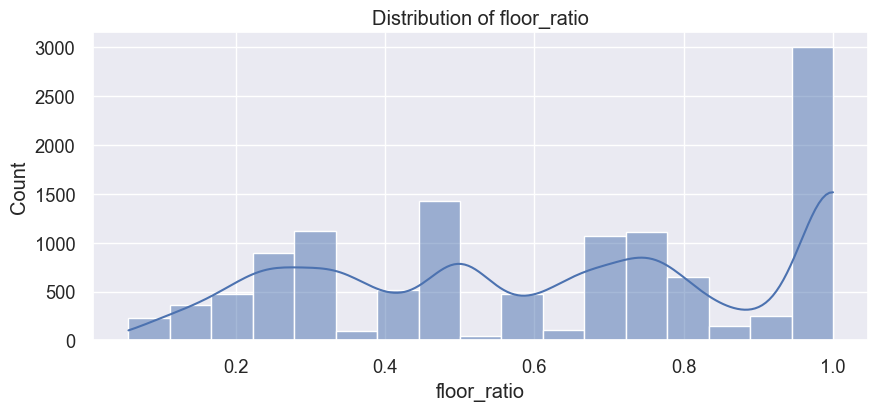

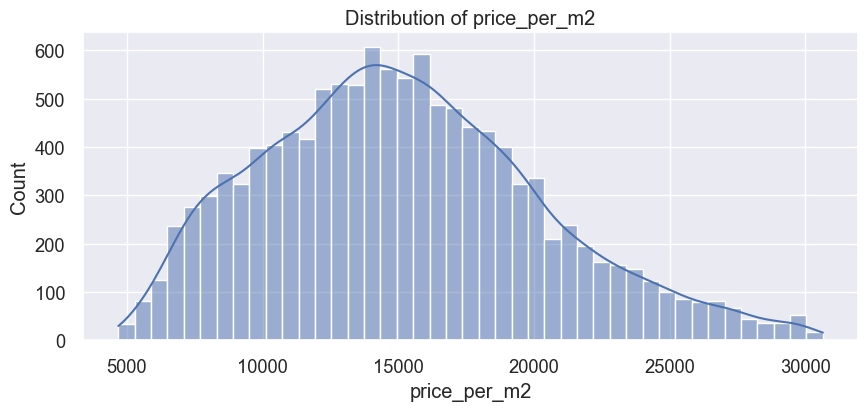

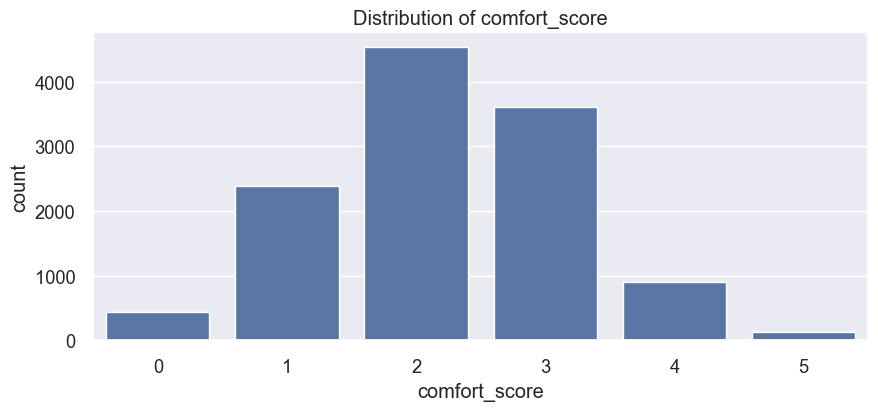

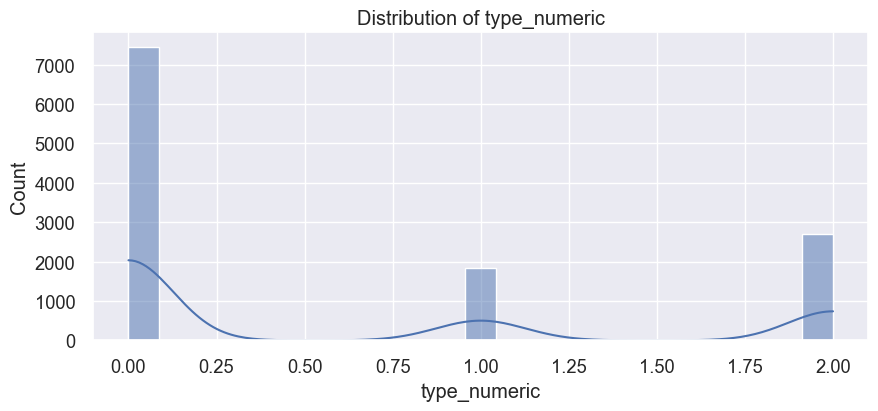

In [14]:
# Check new features
new_features = ['floor_ratio', 'price_per_m2', 'comfort_score', 'type_numeric', 'condition_numeric']
for feature in new_features:
    if feature in processed_df.columns:
        plt.figure(figsize=(10, 4))
        if feature == 'comfort_score':
            plt.title(f'Distribution of {feature}')
            sns.countplot(x=processed_df[feature])
        else:
            plt.title(f'Distribution of {feature}')
            sns.histplot(processed_df[feature], kde=True)
        plt.show()

Let's apply normalization to the processed dataset.

In [15]:
# Apply normalization to the processed dataset
normalized_df = normalize_numeric_features(processed_df)

# Check normalization results
normalized_df.head()

,city,squareMeters,rooms,floor,floorCount,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,type_numeric,floor_ratio,price_per_m2,comfort_score
0,szczecin,0.17600,0.2,0.178571,0.392857,0.750970,0.009108,0.046780,0.316038,False,True,True,False,True,449000,0.0,0.470339,0.187554,0.6
1,szczecin,0.50576,0.4,0.000000,0.035714,0.755453,0.004990,0.247266,0.000000,True,True,False,False,False,950000,1.0,0.470339,0.234353,0.4
2,szczecin,0.06648,0.0,0.000000,0.107143,0.752618,0.007778,0.116039,0.183962,True,False,False,True,True,380000,0.0,0.205508,0.258977,0.6
3,szczecin,0.24800,0.4,0.214286,0.214286,0.755098,0.009680,0.161604,0.047170,True,True,True,True,True,799000,0.0,1.000000,0.369101,1.0
4,szczecin,0.34888,0.4,0.107143,0.107143,0.757006,0.012589,0.238153,0.033019,False,True,False,False,True,599000,0.0,1.000000,0.155875,0.4


In [16]:
# Check the range of normalized features
numeric_columns = [col for col in normalized_df.columns 
                  if normalized_df[col].dtype in ['int64', 'float64'] 
                  and col != 'price'
                  and not (normalized_df[col].isin([0, 1]).all() and normalized_df[col].nunique() <= 2)]

print("Ranges of normalized features:")
for col in numeric_columns:
    print(f"{col}: [{normalized_df[col].min()}, {normalized_df[col].max()}]")

Ranges of normalized features:
squareMeters: [0.0, 1.0]
rooms: [0.0, 1.0000000000000002]
floor: [0.0, 0.9999999999999999]
floorCount: [0.0, 0.9999999999999999]
latitude: [0.0, 1.0]
longitude: [0.0, 1.0]
centreDistance: [0.0, 1.0]
poiCount: [0.0, 1.0]
type_numeric: [0.0, 1.0]
floor_ratio: [0.0, 1.0]
price_per_m2: [0.0, 1.0]
comfort_score: [0.0, 1.0]


Let's check how features correlate with each other and with the target variable (price).

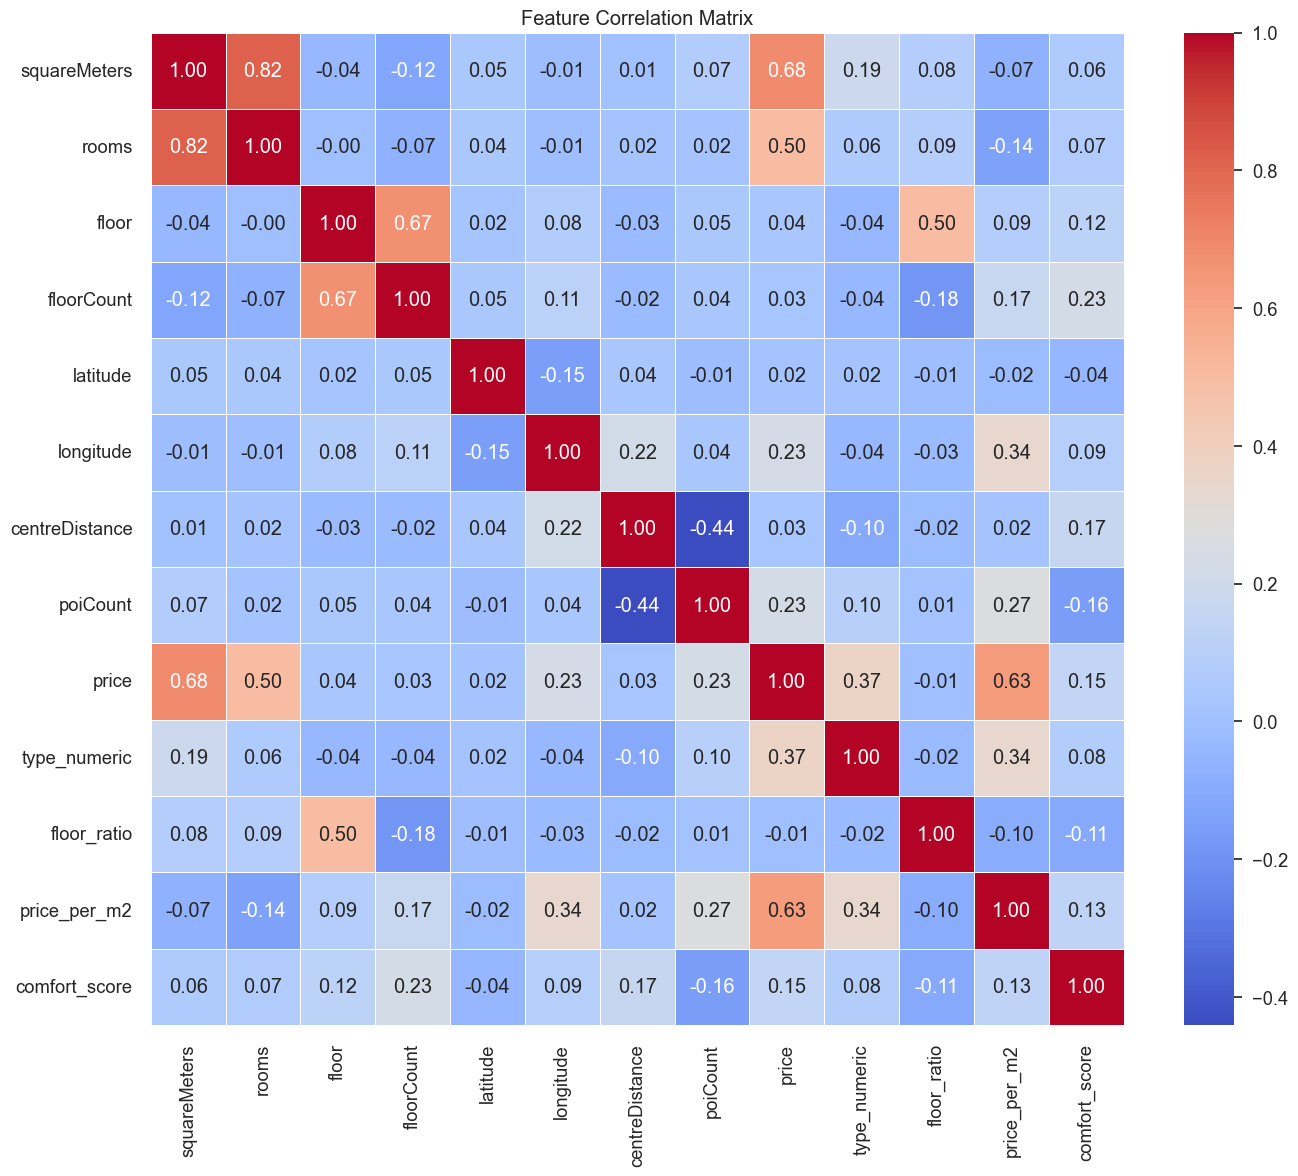

In [17]:
# Building a correlation matrix (numeric columns only)
plt.figure(figsize=(14, 12))
numeric_df = normalized_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Correlation of features with price:
price             1.000000
squareMeters      0.684885
price_per_m2      0.631490
rooms             0.504418
type_numeric      0.367553
longitude         0.233396
poiCount          0.225494
comfort_score     0.147506
floor             0.036006
centreDistance    0.031727
floorCount        0.028680
latitude          0.016899
floor_ratio      -0.005476
Name: price, dtype: float64


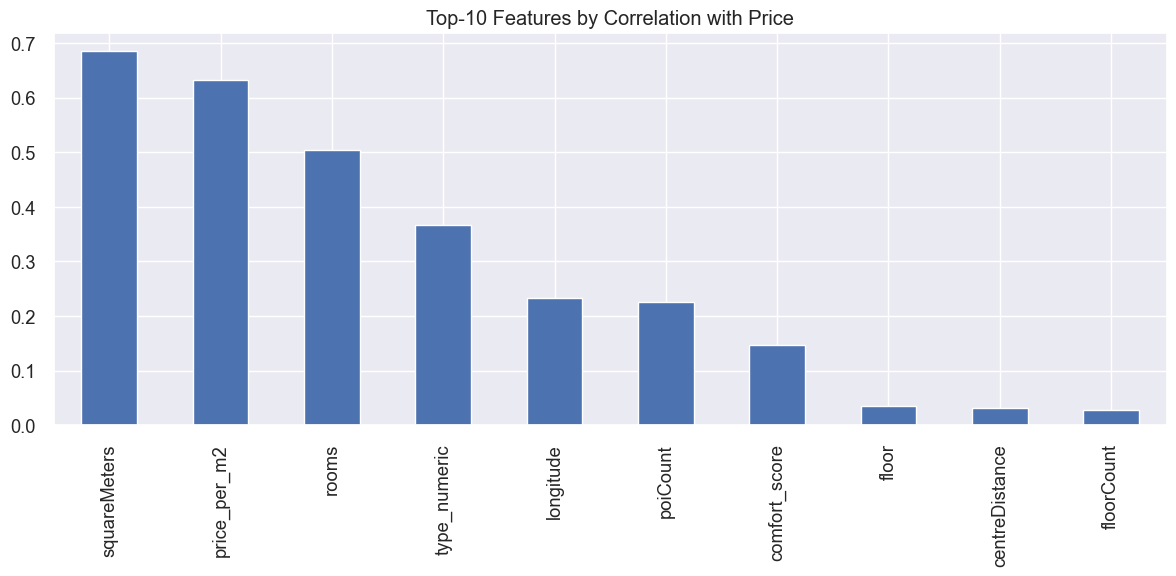

In [18]:
# Sort features by correlation with price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation of features with price:")
print(price_correlations)

# Visualize top-10 features by correlation with price
plt.figure(figsize=(12, 6))
price_correlations.drop('price').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top-10 Features by Correlation with Price')
plt.tight_layout()
plt.show()

## FINAL

Have been developed the `process_row` function that performs all the necessary data transformations for project:                                                                                         

1. Converts binary features from strings ('yes'/'no') to boolean (True/False)
2. Fills missing values
3. Converts categorical features to numerical
4. Creates new informative features
5. Removes unnecessary features

Also implemented an additional `normalize_numeric_features` function to normalize numerical features.

Below is the final version of the `process_row` function that can be used in the Processor component:

In [20]:
def process_row_final(row: pd.Series, normalize=True) -> pd.Series:
    """
    Final function for processing data rows.
    Includes all necessary transformations and optional normalization.
    
    Args:
        row (pd.Series): Row from DataFrame with apartment data
        normalize (bool): Flag indicating whether to normalize numerical features
        
    Returns:
        pd.Series: Processed row with transformed data
    """
    # Create a copy of the row
    processed = row.copy()
    
    # 1. Convert binary string features to boolean values
    binary_columns = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
    for col in binary_columns:            # Fill missing values
        # Convert yes/no to True/False
        processed[col] = True if processed[col] == 'yes' else False
    
    # 3. Convert categorical features to numerical
    # Building type
    type_mapping = {
        'blockOfFlats': 0,
        'tenement': 1,
        'apartmentBuilding': 2
    }
    processed['type_numeric'] = type_mapping.get(processed['type'], 3)

    processed = processed.drop('type')
    
    # Apartment condition
    condition_mapping = {
        'very good': 4,
        'good': 3,
        'average': 2,
        'poor': 1,
        'to renovation': 0
    }

    processed['condition_numeric'] = condition_mapping.get(processed['condition'], 2)

    processed = processed.drop('condition')
    
    # City (if present)
    city_mapping = {
        'warszawa': 0,
        'krakow': 1,
        'wroclaw': 2,
        'gdansk': 3,
        'lodz': 4,
        'poznan': 5,
        'szczecin': 6
    }

    processed['city_numeric'] = city_mapping.get(processed['city'].lower(), 6)
    
    processed = processed.drop('city')
    
    # 4. Create new features
    # Floor ratio to total floors
    processed['floor_ratio'] = round(processed['floor'] / processed['floorCount'], 3)
    
    # Price per square meter
    processed['price_per_m2'] = round(processed['price'] / processed['squareMeters'], 2)
    
    # Combined comfort score
    comfort_features = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
    comfort_score = 0
    for feature in comfort_features:
        if processed[feature]:
            comfort_score += 1
    processed['comfort_score'] = comfort_score
    
    # 5. Remove rarely used or uninformative columns
    columns_to_drop = [
        'buildYear', 'buildingMaterial', 'ownership', 
        'schoolDistance', 'clinicDistance', 'kindergartenDistance', 
        'restaurantDistance', 'collegeDistance', 'pharmacyDistance', 'postOfficeDistance',
        # 'id'
    ]
    
    for col in columns_to_drop:
        processed = processed.drop(col)
    
    # 6. Normalize numerical features (if required)
    if normalize:
        # Define numerical columns (excluding boolean and price target variable)
        numeric_cols = [col for col in processed.index 
                        if isinstance(processed[col], (int, float)) 
                        and col != 'price'
                        and not (isinstance(processed[col], bool) or (processed[col] in [0, 1] and col in binary_columns))]
        
        # Normalization using predefined ranges
        normalization_ranges = {
            'squareMeters': (20, 200),
            'rooms': (1, 6),
            'floor': (0, 20),
            'floorCount': (1, 30),
            'centreDistance': (0, 20),
            'poiCount': (0, 50),
            'type_numeric': (0, 3),
            'condition_numeric': (0, 4),
            'city_numeric': (0, 6),
            'floor_ratio': (0, 1),
            'price_per_m2': (20, 500),
            'comfort_score': (0, 5)
        }
        
        for col in numeric_cols:
            if col in normalization_ranges:
                min_val, max_val = normalization_ranges[col]
                # Limit the value to the range and normalize
                val = max(min(processed[col], max_val), min_val)
                processed[col] = (val - min_val) / (max_val - min_val)
    
    return processed